# 과적합 피하기 - 초음파 광물 데이터

In [2]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)
import pandas as pd

In [3]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving sonar.csv to sonar.csv


In [5]:
import pandas as pd
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
np.unique(df.values[:,-1], return_counts= True)

(array(['M', 'R'], dtype=object), array([111,  97]))

In [7]:
# X data : scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [9]:
# Y data : label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df.iloc[:,-1].values)

- 슬라이싱 하고 변환/ 변환하고 슬라이싱할 것인지 차이!!
1. df.values[:,-1] -> 전체가 문자열로 변환 //df.iloc[:,:-1].values 스케일링 할때 문자열이 아닌 숫자로 입력되어야 되서 values를 뒤로 뺌
2. ```
np.array([0.1,0.2, 'R'])
```
3. 타입이 스트링/숫자가 아니라 문자열로 바뀐다.

- 나누는 것

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y_labeled, stratify = Y_labeled, test_size = 0.2, random_state = seed
)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #input shape 은 60개

((166, 60), (42, 60), (166,), (42,))

- 모델 정의/설정/학습/평가

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

1. 은닉층의 갯수: 2개 

In [20]:
model1 = Sequential([
    Dense(80, input_dim=60, activation= 'relu'),  # Hiddem Layer
    Dense(12, activation= 'relu'),                # Output Layer
    Dense(1, activation= 'sigmoid')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                4880      
                                                                 
 dense_1 (Dense)             (None, 12)                972       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [23]:
model1.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)

In [24]:
history = model1.fit(
    X_train,  y_train, validation_split = 0.2, epochs =200, batch_size = 50, verbose =0
)

In [25]:
model1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3529 - accuracy: 0.9048


[0.3528617322444916, 0.9047619104385376]

- 은닉층의 갯수 : 4개

In [28]:
model2 = Sequential([
    Dense(64, input_dim=60, activation= 'relu'),  # Hiddem Layer
    Dense(30,  activation= 'relu'),
    Dense(12, activation= 'relu'),                # Output Layer
    Dense(4,  activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                3904      
                                                                 
 dense_14 (Dense)            (None, 30)                1950      
                                                                 
 dense_15 (Dense)            (None, 12)                372       
                                                                 
 dense_16 (Dense)            (None, 4)                 52        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 6,283
Trainable params: 6,283
Non-trainable params: 0
_________________________________________________________________


In [31]:
model2.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)

In [32]:
history2 = model2.fit(
    X_train,  y_train, validation_split = 0.2, epochs =200, batch_size = 50, verbose =0
)

In [33]:
model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.9255 - accuracy: 0.8095


[0.9254899024963379, 0.8095238208770752]

In [ ]:
- 은닉층 갯수 : 6개 

In [39]:
model3 = Sequential([
    Dense(64, input_dim=60, activation= 'relu'),  # Hiddem Layer
    Dense(40,  activation= 'relu'),
    Dense(28, activation= 'relu'),
    Dense(16,  activation= 'relu'),
    Dense(8, activation= 'relu'),                # Output Layer
    Dense(4,  activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                3904      
                                                                 
 dense_26 (Dense)            (None, 40)                2600      
                                                                 
 dense_27 (Dense)            (None, 28)                1148      
                                                                 
 dense_28 (Dense)            (None, 16)                464       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dense_30 (Dense)            (None, 4)                 36        
                                                                 
 dense_31 (Dense)            (None, 1)                

In [40]:
model3.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)


In [41]:
history3 = model3.fit(
    X_train,  y_train, validation_split = 0.2, epochs =200, batch_size = 50, verbose =0
)

In [42]:
model3.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6061 - accuracy: 0.7857


[0.6060886383056641, 0.7857142686843872]

- model1을 그대로 사용하는데, epoch 횟수를 늘린다.


In [43]:
model = Sequential([
    Dense(80, input_dim=60, activation= 'relu'),  # Hiddem Layer
    Dense(12, activation= 'relu'),                # Output Layer
    Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 80)                4880      
                                                                 
 dense_33 (Dense)            (None, 12)                972       
                                                                 
 dense_34 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)

In [46]:
history4 = model.fit(
    X_train,  y_train, validation_split = 0.2, epochs =1000, batch_size = 50, verbose =0
)

In [47]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.6521 - accuracy: 0.8810


[0.6520997881889343, 0.8809523582458496]

In [48]:
import matplotlib.pyplot as plt

In [51]:
y_acc = history4.history['accuracy'][:200]
y_vloss = history4.history['val_loss'][:200]
xs = np.arange(1,len(y_acc)+1)


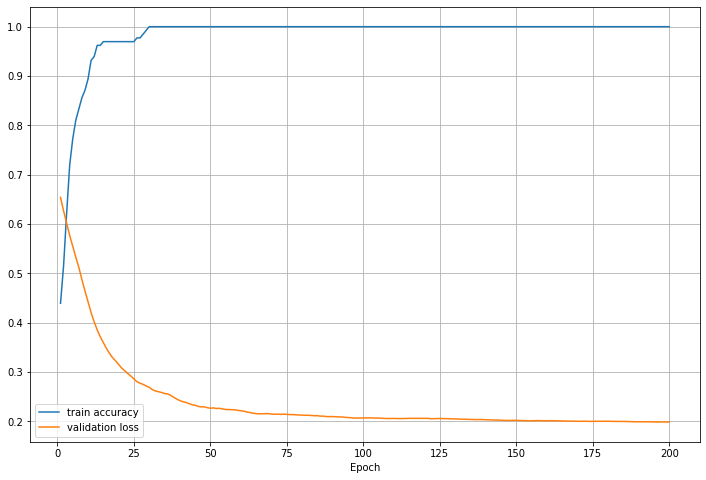

In [52]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

- 모델 저장조건 설정

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint # 실행하고 나서 사용하는 함수 

In [60]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [61]:
model_path = 'model/sonar.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor= 'val_loss', verbose = 1, save_best_only = True
)

In [62]:
model = Sequential([
    Dense(80, input_dim=60, activation= 'relu'),  # Hiddem Layer
    Dense(12, activation= 'relu'),                # Output Layer
    Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 80)                4880      
                                                                 
 dense_39 (Dense)            (None, 12)                972       
                                                                 
 dense_40 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)
history4 = model.fit(
    X_train,  y_train, validation_split = 0.2, epochs =200, batch_size = 50, verbose =0, callbacks=[checkpoint]
)


Epoch 00001: val_loss improved from inf to 0.68870, saving model to model/sonar.h5

Epoch 00002: val_loss improved from 0.68870 to 0.63830, saving model to model/sonar.h5

Epoch 00003: val_loss improved from 0.63830 to 0.60043, saving model to model/sonar.h5

Epoch 00004: val_loss improved from 0.60043 to 0.56787, saving model to model/sonar.h5

Epoch 00005: val_loss improved from 0.56787 to 0.54009, saving model to model/sonar.h5

Epoch 00006: val_loss improved from 0.54009 to 0.51773, saving model to model/sonar.h5

Epoch 00007: val_loss improved from 0.51773 to 0.49643, saving model to model/sonar.h5

Epoch 00008: val_loss improved from 0.49643 to 0.47918, saving model to model/sonar.h5

Epoch 00009: val_loss improved from 0.47918 to 0.46377, saving model to model/sonar.h5

Epoch 00010: val_loss improved from 0.46377 to 0.44851, saving model to model/sonar.h5

Epoch 00011: val_loss improved from 0.44851 to 0.43345, saving model to model/sonar.h5

Epoch 00012: val_loss improved from

In [66]:
y_acc = history4.history['accuracy'][:200]
y_vloss = history4.history['val_loss'][:200]
xs = np.arange(1,len(y_acc)+1)


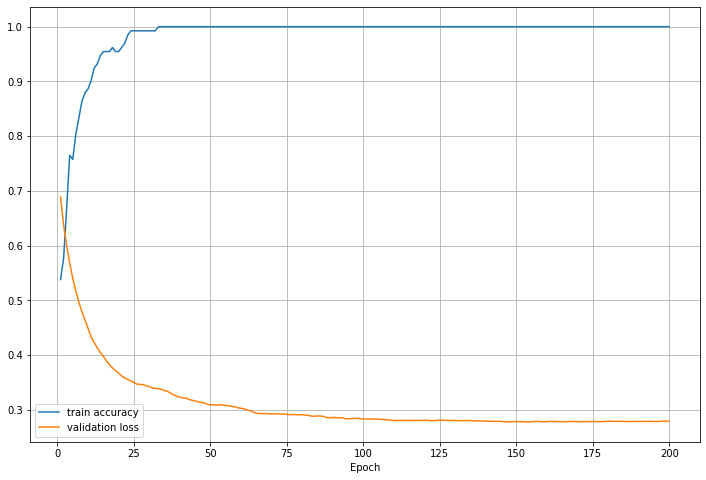

In [67]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [68]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.8810


[0.3970237970352173, 0.8809523582458496]

- 과적합 피할수 있고 가장 학습이 잘된 모델  = epoch 75지점

- early stopping : 평가했는데 더이상 좋아지지않으면 멈추겠다.
1. 조기 종료시점 설정

In [78]:
del model

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience = 30)

In [80]:
model = Sequential([
    Dense(80, input_dim=60, activation= 'relu'),  # Hiddem Layer
    Dense(12, activation= 'relu'),                # Output Layer
    Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 80)                4880      
                                                                 
 dense_42 (Dense)            (None, 12)                972       
                                                                 
 dense_43 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)
history5 = model.fit(
    X_train,  y_train, validation_split = 0.2, epochs =400, 
    batch_size = 50, verbose =1, callbacks=[checkpoint, early_stopping]
)

Epoch 1/400
1/3 [=========>....................] - ETA: 1s - loss: 0.7587 - accuracy: 0.4400
Epoch 00001: val_loss did not improve from 0.27752
3/3 [==============================] - 1s 88ms/step - loss: 0.7279 - accuracy: 0.5152 - val_loss: 0.6769 - val_accuracy: 0.4706
Epoch 2/400
1/3 [=========>....................] - ETA: 0s - loss: 0.7454 - accuracy: 0.4800
Epoch 00002: val_loss did not improve from 0.27752
3/3 [==============================] - 0s 16ms/step - loss: 0.6621 - accuracy: 0.5758 - val_loss: 0.6334 - val_accuracy: 0.5588
Epoch 3/400
1/3 [=========>....................] - ETA: 0s - loss: 0.6161 - accuracy: 0.7200
Epoch 00003: val_loss did not improve from 0.27752
3/3 [==============================] - 0s 19ms/step - loss: 0.6131 - accuracy: 0.6212 - val_loss: 0.6004 - val_accuracy: 0.7059
Epoch 4/400
1/3 [=========>....................] - ETA: 0s - loss: 0.5628 - accuracy: 0.7000
Epoch 00004: val_loss did not improve from 0.27752
3/3 [==============================] - 0

In [82]:
y_acc = history5.history['accuracy'][:200]
y_vloss = history5.history['val_loss'][:200]
xs = np.arange(1,len(y_acc)+1)

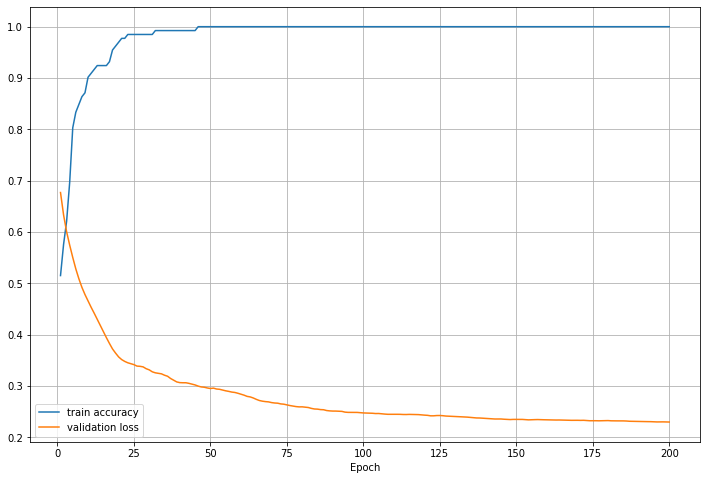

In [83]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [84]:
# 모델 삭제하고 재실행

In [85]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.5332 - accuracy: 0.8333


[0.5332094430923462, 0.8333333134651184]